In this colab, we will demonstrate working of `MLPClassifier` to classify handwritten digits in `MNIST` dataset.

## **Imports**

* We will begin by importing basic python libraries like `numpy` and `pandas`.
* `matplotlib.pyplot` and `seaborn` for plotting.
* The `mnist` dataset is downloaded using `fetch_openml` library.
* The `MLPClassifier` is imported from `sklearn.neural_network` module.
* The model training and evaluation is performed with cross validation using a bunch of model selection utilities like `cross_val_score`, `train_test_split`, `StratifiedShuffleSplit` etc.
* The performance on the test samples is obtained via `accuracy_score`, `confusion_matrix` and `classification_report`.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, \
  ConfusionMatrixDisplay, plot_confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score, train_test_split, \
  GridSearchCV, StratifiedShuffleSplit

In [ ]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

## **Load dataset**

Let us use the MNIST Dataset for the demo of MLPClassifier

In [ ]:
# Load dataset
X,y= fetch_openml('mnist_784',version=1,return_X_y=True) 
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
# Flatten each input image into a vector of length 784 
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# Normalizing. 
X_train = X_train/255
X_test = X_test/255

In [ ]:
print('Shape of training data after flattening',X_train.shape)
print('Shape of testing data after flattening', X_test.shape)

Shape of training data after flattening (60000, 784)
Shape of testing data after flattening (10000, 784)


In [ ]:
print('Shape of training data',X_train.shape)
print('Shape of training labels', y_train.shape)
print('Shape of testing data', X_test.shape)
print('Shape of testing labels',y_test.shape)

Shape of training data (60000, 784)
Shape of training labels (60000,)
Shape of testing data (10000, 784)
Shape of testing labels (10000,)


## **Fit MLPClassifer on MNIST dataset**

Let us train a MLP classifier with one hidden layer having 128 neurons.

In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes=(128,))
mlpc.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128,))

In [ ]:
cv_score = cross_val_score(mlpc, X_train, y_train.ravel(),cv=cv)
print("Training Accuracy: {:.2f} %".format(cv_score.mean()*100))

Training Accuracy: 97.76 %


In [ ]:
# prediction probabilities of test data
mlpc.predict_proba(X_test[:5])

array([[1.06138669e-14, 1.77613729e-18, 4.86222198e-11, 9.86435121e-09,
        4.74936807e-20, 1.95241908e-15, 2.22562272e-21, 9.99999990e-01,
        1.13984812e-10, 1.50664103e-11],
       [8.25634627e-16, 4.10916659e-11, 1.00000000e+00, 1.09330419e-15,
        2.85975297e-37, 9.08010005e-14, 1.28867634e-15, 6.38071579e-26,
        1.50561107e-13, 2.73934572e-27],
       [1.47808357e-11, 9.99982209e-01, 6.99324982e-06, 1.87356336e-10,
        3.08202451e-10, 1.50705265e-10, 9.62829961e-10, 1.70848524e-06,
        9.08726472e-06, 4.51337574e-13],
       [9.99999999e-01, 2.00493268e-19, 4.47908857e-13, 7.31215250e-14,
        3.15567674e-18, 2.61214926e-14, 5.88279815e-13, 1.06207332e-09,
        1.06206537e-21, 1.23088390e-16],
       [3.01269603e-12, 2.83033346e-23, 7.95568726e-11, 1.24637365e-17,
        9.99997732e-01, 1.28147323e-14, 4.01228947e-14, 1.02490893e-10,
        5.04514572e-11, 2.26808974e-06]])

In [ ]:
# prediction class labels of test data
y_pred = mlpc.predict(X_test)

In [ ]:
print("Train accuracy: {:.2f}%".format(
    accuracy_score(y_train, mlpc.predict(X_train))*100))
print("Test accuracy: {:.2f}%".format(
    accuracy_score(y_test, y_pred)*100))

Train accuracy: 100.00%
Test accuracy: 98.07%


## **Confusion matrix plot**

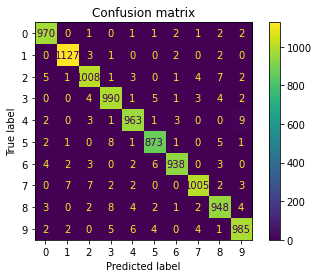

In [ ]:
# visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion matrix')
plt.show()

In [ ]:
CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Plot of test data along with predicted class labels

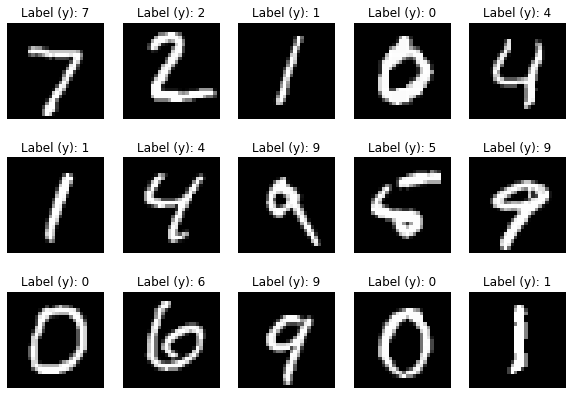

In [ ]:
# Plotting some test samples and 
fig = plt.figure(figsize=(10,7))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X_test[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=y_pred[i]))
    plt.axis('off')

## **Visualization of multi layer perceptron weights in hidden layer**

- Looking at the learned coefficients of a neural network can provide insight into the learning behavior. 
- The input data consists 784 features in the dataset. 
- We have used one hidden layer with 128 neurons. Therefore weight matrix has the shape (784, 128). 
- We can therefore visualize a single column of the weight matrix as a 28 x 28 pixel image.

In [ ]:
w = mlpc.coefs_
w = np.array(w[0])
w.shape

(784, 128)

In [ ]:
w1 = np.array(w[:,0])
w1.shape

(784,)

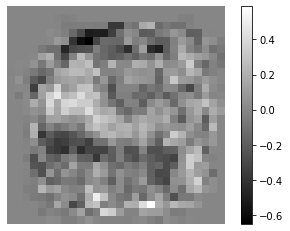

In [ ]:
w_matrix = w1.reshape(28,28)
fig = plt.figure()
plt.imshow(w_matrix,cmap='gray')
plt.grid(False)
plt.axis(False)
plt.colorbar()
plt.show()

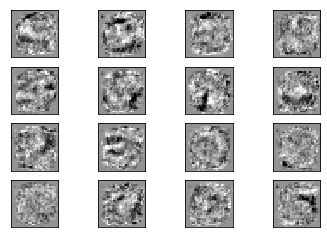

In [ ]:
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlpc.coefs_[0].min(), mlpc.coefs_[0].max()
for coef, ax in zip(mlpc.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray,
               vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

Text(0.5, 1.0, 'Loss curve')

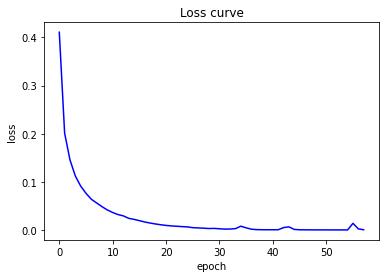

In [ ]:
plt.plot(mlpc.loss_curve_, 'b-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss curve')

## **Using GridsearchCV**

Let us use a grid search cross-validation to explore combinations of parameters of MLPClassifier. 
1. Activation functions
2. Learning rate strategies
3. Alpha

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

# learning_strategy=['constant','invscaling']
# activation_func=['identity', 'logistic', 'tanh', 'relu']
# alphas = np.logspace(-1, 1, 5)


# param_grid = dict(activation = activation_func, learning_rate=learning_strategy, alpha=alphas)
# cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
# grid = GridSearchCV(MLPClassifier(learning_rate_init=0.1, max_iter=100,solver='adam'), param_grid=param_grid, cv=cv)
# grid.fit(X_train, y_train)
# 

In [ ]:
# print("The best parameters are : ", grid.best_params_)
# print("The best score is : ", grid.best_score_*100)